In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import chart_studio.plotly as py
import cufflinks as cf

In [3]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [4]:
init_notebook_mode(connected=True)

In [5]:
cf.go_offline()

In [50]:
gender_sub = pd.read_csv("../datasets/titanic/gender_submission.csv")
test = pd.read_csv("../datasets/titanic/test.csv")
train = pd.read_csv("../datasets/titanic/train.csv")

In [56]:
gender_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [52]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [63]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived'>

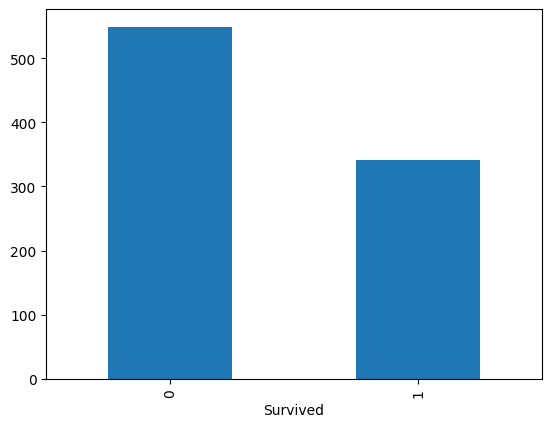

In [140]:
train["Survived"].value_counts().plot(kind="bar")

<Axes: xlabel='Fare', ylabel='Age'>

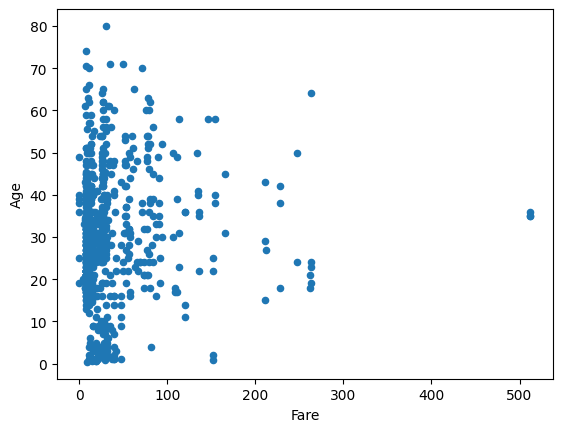

In [129]:
train.plot(x="Fare",y="Age",kind="scatter")

<Axes: title={'center': 'Age'}, xlabel='Sex'>

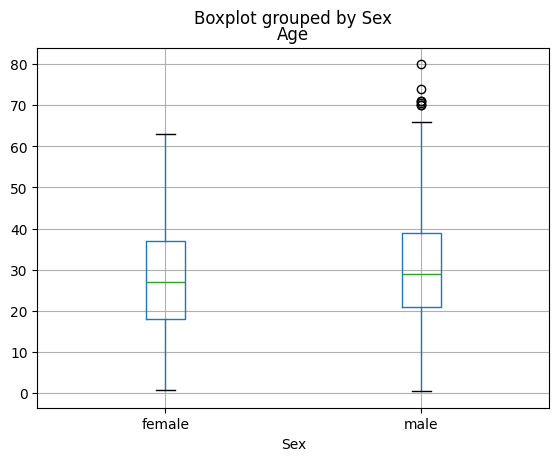

In [139]:
train.boxplot(column="Age", by="Sex", grid=True)

In [152]:
x = train["Fare"]
y = train["Age"]

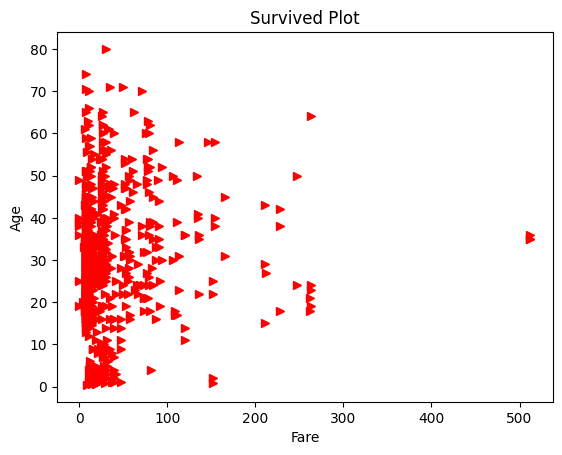

In [153]:
plt.plot(x,y,"r>")
plt.xlabel("Fare")
plt.ylabel("Age")
plt.title("Survived Plot")
plt.show()

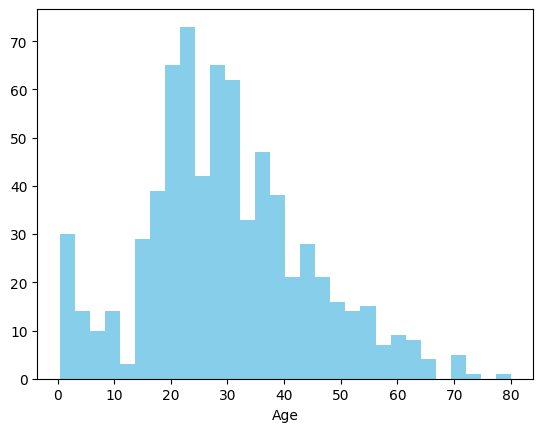

In [158]:
plt.hist(train["Age"].dropna(), bins=30, color="skyblue")
plt.xlabel("Age")
plt.show()

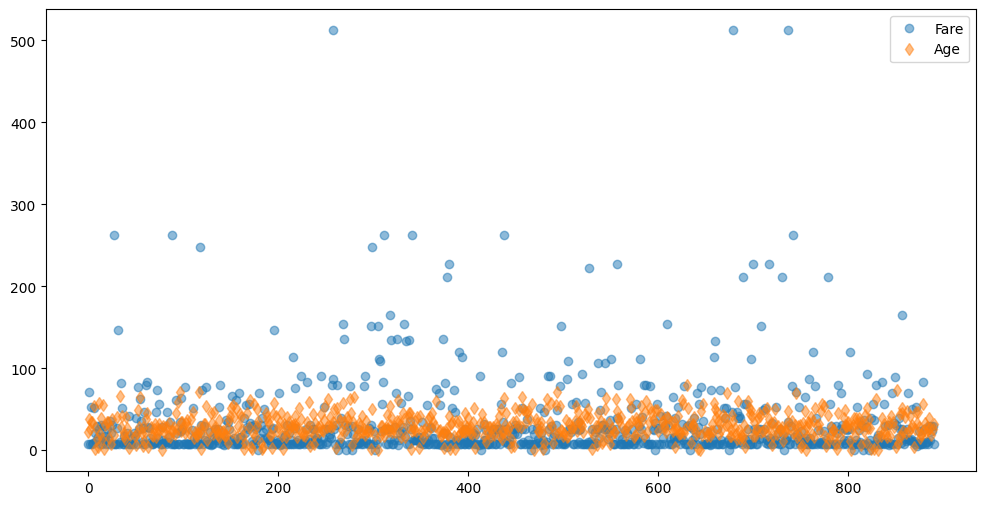

In [162]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(train["Fare"], "o", label="Fare", alpha=0.5)
ax.plot(train["Age"], "d", label="Age", alpha=0.5)
ax.legend()

C:\Users\cathe\AppData\Local\Temp\ipykernel_23464\634442618.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Pclass', ylabel='Age'>

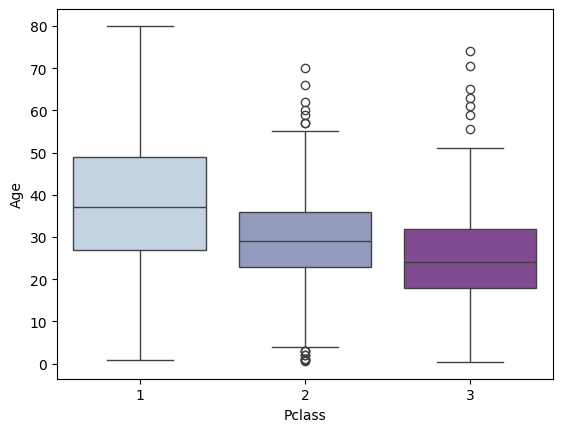

In [193]:
sns.boxplot(x="Pclass", y="Age", data=train, palette="BuPu")

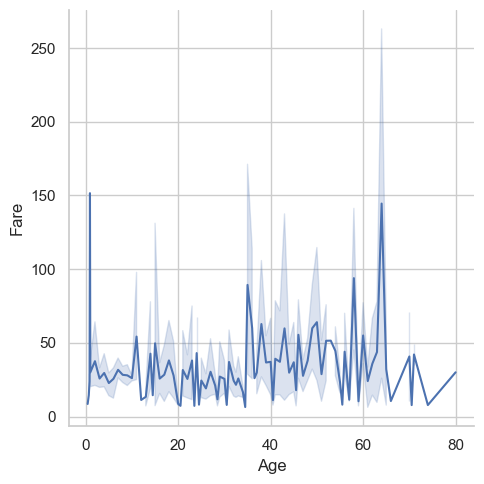

In [212]:
sns.set_theme(style="whitegrid")
sns.relplot(data=train, x= "Age", y="Fare", kind="line")

In [64]:
merge_df = pd.merge(test[["PassengerId", "Pclass", "Name", "Sex", "Age", "Embarked"]], gender_sub, on="PassengerId")
df = pd.concat([merge_df, train[["PassengerId", "Pclass", "Name", "Sex", "Age", "Embarked", "Survived"]]])
df.head()

,PassengerId,Pclass,Name,Sex,Age,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,S,1


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   Embarked     1307 non-null   object 
 6   Survived     1309 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 81.8+ KB


<Axes: >

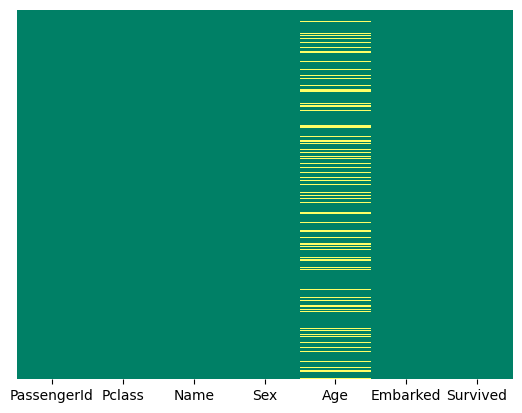

In [165]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="summer")

<Axes: xlabel='Survived', ylabel='count'>

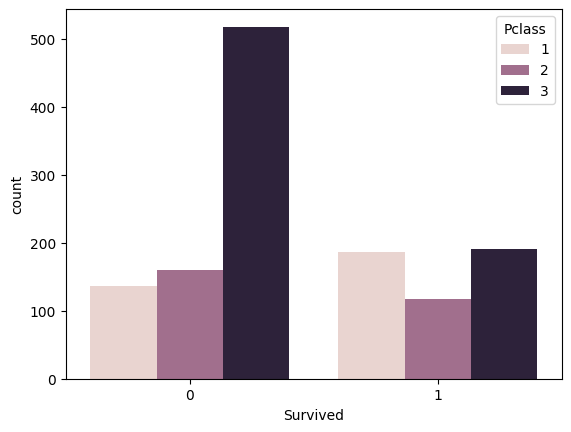

In [171]:
sns.countplot(x="Survived", hue="Pclass", data=df)

In [191]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,S,1


In [173]:
df.corr(numeric_only=True)

,PassengerId,Pclass,Age,Survived
PassengerId,1.000000,-0.038354,0.028814,-0.020370
Pclass,-0.038354,1.000000,-0.408106,-0.264710
Age,0.028814,-0.408106,1.000000,-0.053695
Survived,-0.020370,-0.264710,-0.053695,1.000000


<Axes: >

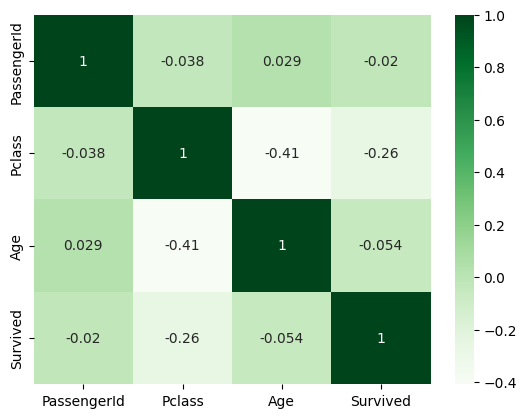

In [186]:
sns.heatmap(df.corr(numeric_only=True), cmap="Greens", annot=True)